In [6]:
import os, shutil

original_dataset_dir = 'E:\\Datasets\\Kaggle\\dog_cat\\train'
base_dir = 'E:\\Datasets\\Kaggle\\dog_cat\\base'

os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    


In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print("data_batch shape", data_batch.shape)
    print("labels_batch shape", labels_batch.shape)
    break

data_batch shape (20, 150, 150, 3)
labels_batch shape (20,)


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)
model.save(os.path.join(base_dir, 'cats_dogs_small_1.h5'))

Epoch 1/30
100/100 [==============================] - 9s 85ms/step - loss: 0.6909 - acc: 0.5310 - val_loss: 0.6730 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6581 - acc: 0.6195 - val_loss: 0.6522 - val_acc: 0.6030
Epoch 3/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6103 - acc: 0.6665 - val_loss: 0.6184 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5689 - acc: 0.7035 - val_loss: 0.5982 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5362 - acc: 0.7285 - val_loss: 0.6015 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5179 - acc: 0.7415 - val_loss: 0.5794 - val_acc: 0.6860
Epoch 7/30
100/100 [==============================] - 6s 60ms/step - loss: 0.4974 - acc: 0.7615 - val_loss: 0.6154 - val_acc: 0.6800
Epoch 8/30
100/100 [==============================] - 6s 59ms/step - 

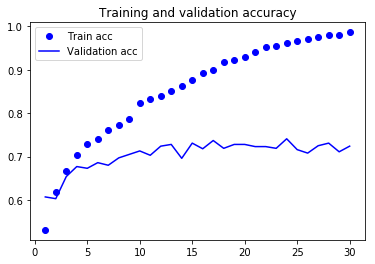

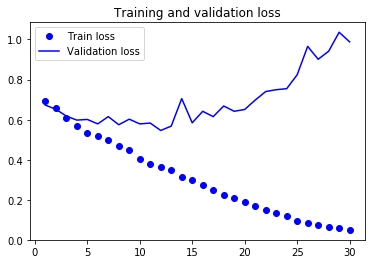

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [19]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

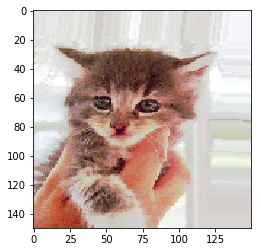

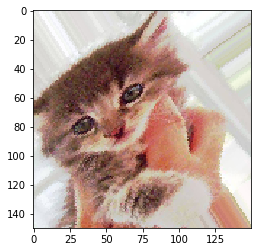

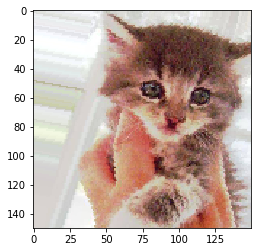

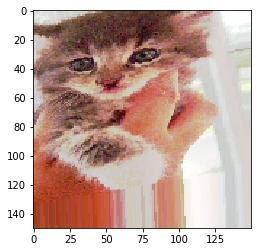

In [22]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0 
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])


In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)
model.save(os.path.join(base_dir, 'cats_dogs_small_2.h5'))

Epoch 1/100
100/100 [==============================] - 15s 151ms/step - loss: 0.6945 - acc: 0.5100 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 14s 137ms/step - loss: 0.6861 - acc: 0.5435 - val_loss: 0.6838 - val_acc: 0.5510
Epoch 3/100
100/100 [==============================] - 14s 137ms/step - loss: 0.6744 - acc: 0.5625 - val_loss: 0.6914 - val_acc: 0.5600
Epoch 4/100
100/100 [==============================] - 14s 139ms/step - loss: 0.6548 - acc: 0.6020 - val_loss: 0.6394 - val_acc: 0.6300
Epoch 5/100
100/100 [==============================] - 14s 137ms/step - loss: 0.6374 - acc: 0.6260 - val_loss: 0.6263 - val_acc: 0.6380
Epoch 6/100
100/100 [==============================] - 14s 137ms/step - loss: 0.6249 - acc: 0.6445 - val_loss: 0.6144 - val_acc: 0.6650
Epoch 7/100
100/100 [==============================] - 14s 136ms/step - loss: 0.6084 - acc: 0.6585 - val_loss: 0.6093 - val_acc: 0.6580
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 14s 139ms/step - loss: 0.4492 - acc: 0.7930 - val_loss: 0.5156 - val_acc: 0.7410
Epoch 62/100
100/100 [==============================] - 14s 140ms/step - loss: 0.4498 - acc: 0.7930 - val_loss: 0.4917 - val_acc: 0.7660
Epoch 63/100
100/100 [==============================] - 14s 139ms/step - loss: 0.4536 - acc: 0.7880 - val_loss: 0.5111 - val_acc: 0.7350
Epoch 64/100
100/100 [==============================] - 14s 138ms/step - loss: 0.4447 - acc: 0.7860 - val_loss: 0.5026 - val_acc: 0.7470
Epoch 65/100
100/100 [==============================] - 14s 139ms/step - loss: 0.4366 - acc: 0.7945 - val_loss: 0.4802 - val_acc: 0.7640
Epoch 66/100
100/100 [==============================] - 14s 139ms/step - loss: 0.4362 - acc: 0.7920 - val_loss: 0.5070 - val_acc: 0.7420
Epoch 67/100
100/100 [==============================] - 14s 140ms/step - loss: 0.4461 - acc: 0.7930 - val_loss: 0.5612 - val_acc: 0.7270
Epoch 68/100
100/100 [===================

KeyboardInterrupt: 

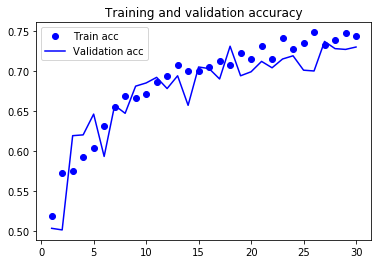

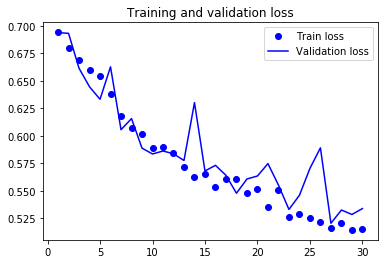

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()